**Vamos experimentar agora o algoritmo Decision Tree?**

In [2]:
!pip -q install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

/home/lucas/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
import pickle
with open('iris.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [1]:
from sklearn.model_selection import GridSearchCV

In [7]:
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

In [8]:
modelo.fit(X_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.6}
0.95


**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

In [9]:
modelo= DecisionTreeClassifier(max_depth=10, criterion='gini', max_features=0.4)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=10, max_features=0.4)



> **Vamos testar o modelo?**



In [10]:

previsoes = modelo.predict(X_teste)

In [11]:
previsoes

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)



> **Será se o modelo acertou?**



In [12]:
y_teste

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: class, dtype: object

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.9666666666666667

In [14]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

/home/lucas/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9666666666666667

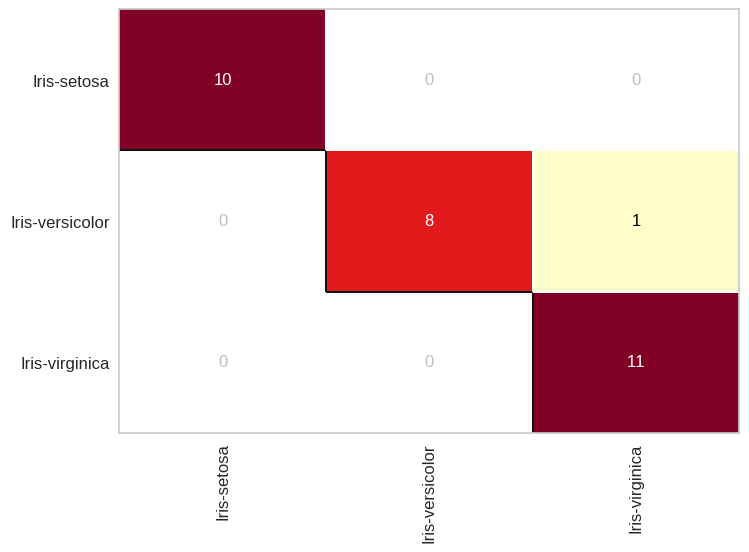

In [15]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [16]:
print(classification_report(y_teste, previsoes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



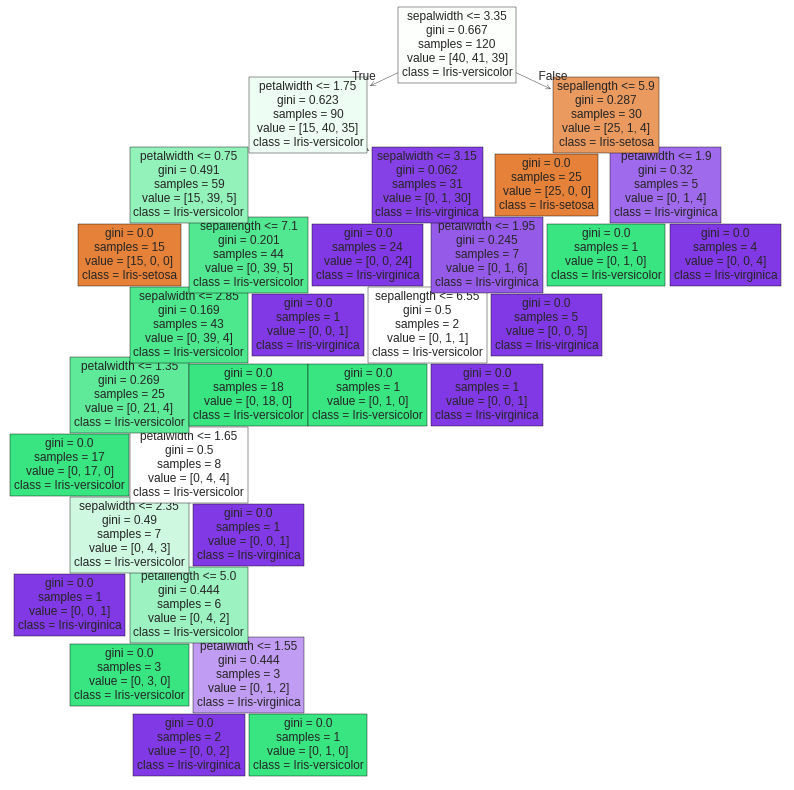

In [17]:
from sklearn import tree
previsores = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);